In [78]:
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
from scipy import interpolate

In [68]:
intervalo=np.linspace(-1,1)

position=np.zeros((4,2))
position[0]=[1,1]
position[1]=[-1,1]
position[2]=[-1,-1]
position[3]=[1,-1]
print(position)

[[ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]]


In [69]:
def func_T(p,x,y):
  elem=0
  a=[[p[0],p[2]],[p[1],p[3]]]
  for i in range(2):
    for j in range(2):
      elem+=a[i][j]*(x**i)*(y**j)
  return elem

In [70]:
x=sym.Symbol("x")
y=sym.Symbol("y")
a_00=sym.Symbol("a_{00}")
a_10=sym.Symbol("a_{10}")
a_01=sym.Symbol("a_{01}")
a_11=sym.Symbol("a_{11}")
p=(a_00,a_10,a_01,a_11)
form=func_T(p,x,y)
form

a_{00} + a_{01}*y + a_{10}*x + a_{11}*x*y

In [71]:
def sist_ecuaciones(f,P,T):
  a_00=sym.Symbol("a_{00}")
  a_10=sym.Symbol("a_{10}")
  a_01=sym.Symbol("a_{01}")
  a_11=sym.Symbol("a_{11}")
  p=(a_00,a_10,a_01,a_11)
  
  ec_1=f(p,P[0][0],P[0][1])-T[0]
  ec_2=f(p,P[1][0],P[1][1])-T[1]
  ec_3=f(p,P[2][0],P[2][1])-T[2]
  ec_4=f(p,P[3][0],P[3][1])-T[3]

  sol=sym.solve([ec_1, ec_2,ec_3,ec_4], (a_00, a_10,a_01,a_11))
  return sol

In [72]:
from sympy.ntheory import qs
sol=sist_ecuaciones(func_T,position,[1,2,0.5,0.3])
print(sol)
p=[]
for i in sol:
  p.append(sol[i])
print(p)

{a_{00}: 0.950000000000000, a_{10}: -0.300000000000000, a_{01}: 0.550000000000000, a_{11}: -0.200000000000000}
[0.950000000000000, -0.300000000000000, 0.550000000000000, -0.200000000000000]


In [73]:
T1=func_T(p,1,1)
T2=func_T(p,-1,1)
T3=func_T(p,-1,-1)
T4=func_T(p,1,-1)
t=[T1,T2,T3,T4]
print(T1,T2,T3,T4)

1.00000000000000 2.00000000000000 0.500000000000000 0.300000000000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  # Remove the CWD from sys.path while we load stuff.


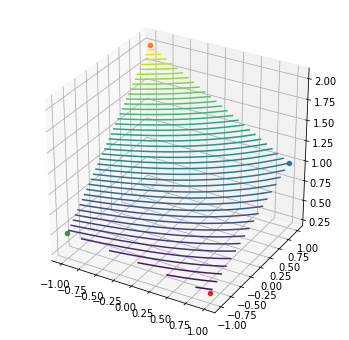

In [74]:
x=intervalo
y=intervalo
X, Y = np.meshgrid(x, y)
temp=func_T(p,X,Y)


fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.contour3D(x, y, temp, 50, rstride=1, cstride=1,
                cmap='viridis', edgecolor='red')
ax.scatter(1,1,1)
ax.scatter(-1,1,2)
ax.scatter(-1,-1,0.5)
ax.scatter(1,-1,0.3)

In [116]:
def rot_matriz(theta,P):
  matx_mult=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
  n_P=[]
  for i in P:
    vect_n=matx_mult.dot(i)
    n_P.append(vect_n)
  return n_P

In [91]:
def interpolacion(x,y,z,p_inter):
  t_n=interpolate.interp2d(x, y, z)
  T_p=t_n(p_inter(x),p_inter(y))
  return T_p

In [ ]:
theta = np.linspace(0,2*np.pi,200)
P=position
T=func_T(p,0,0.5)
print(T) #T inicial, sin rotar
temps=[]

Temperaturas=[]
for i in theta:
    P=rot_matriz(i,P)
    sol=sist_ecuaciones(func_T, P,t)
    p=[]
    for j in sol:
      p.append(sol[j])
    temps.append(func_T(p,0,0.5))




1.22500000000000


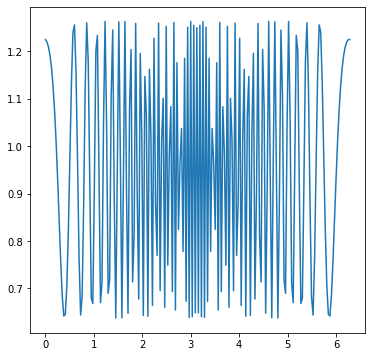

In [121]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(theta,temps)